## 实验：图像加法

### 实验概要

到目前为止，我们已经讨论了所有主要的图像几何变换技术（翻转、平移、旋转、缩放、仿射变换、透视变换）。

现在，我们将讨论图像处理中的另一个重要主题：图像运算。

#### 图像运算基础

我们知道图像不过是矩阵。这就提出了一个重要而有趣的问题。如果我们可以对矩阵进行算术运算，那么我们也可以对图像进行算术运算吗？

我们可以对图像执行以下操作：

- 加减两个图像
- 向图像添加常数或从图像中减去常数
- 用常数乘以图像

当然，如果我们可以假设两个图像是矩阵，则可以将它们相乘。但是就图像而言，将两个图像相乘没有多大意义，除非是以像素为单位进行的。

##### 图像加法

我们知道图像由像素组成，像素的颜色由像素值决定。 因此，当我们谈论向图像添加常量时，是指向图像的像素值添加常量。尽管这似乎是一个非常简单的任务，但是有一个小概念需要适当讨论。通常，图像中的像素值是使用无符号的 `8` 位整数表示的，这就是为什么像素值范围是从 `0` 到 `255` 的原因。现在，假设您要将 `200` 值添加到图像中，即对图像的所有像素全部加上 `200`。如果图像中的像素值为 `220`，则新值将变为 `220 + 200 =420`。由于此值超出范围（0-255），因此可能会发生两件事：

1. 该值将被裁剪为最大值 —— 这意味着将 `420` 修改为 `255`。
2. 该值将遵循循环顺序或取模运算。取模运算意味着您要查找一个值除以另一个值后获得的余数。譬如：这里就是除以 `255`（范围中的最大值）,即 `420` 变为 `165`（将 `420` 除以 `255` 后获得的余数）。

请注意，上述两种方法所获得的结果是不同的。 

第一种方法，也是推荐的方法，它使用 OpenCV 的 `cv2.add` 函数。 `cv2.add` 函数的用法如下：

**`dst = cv2.add(src1, src2)`**

第二种方法，在叠加两个图像时使用 `NumPy`，方法如下：

**`dst = src1 + src2`**

`src1` 指的是我们试图叠加到第二个图像/常量 `src2` 中的第一个图像。这将给出合成图像 `dst` 作为输出。这两种方法都可以用来叠加两个图像。

在实验中我们将很快看到，当我们使用 OpenCV 向图像添加一个常量值时，默认情况下，该值会被添加到图像的第一个通道。因为我们已经知道 OpenCV 中的图像是用 BGR 模式表示的，所以这个值被添加到蓝色通道中，使图像的色调更蓝。另一方面，当我们应用 NumPy 实现时，该值将添加到每个通道的方式自动广播。让我们在实验的帮助下比较这两种方法。

### 实验目标

在这个实验中，我们将学习如何向图像添加常量值以及执行该任务的方法。我们将在下面的图像上工作。

首先，我们将使用 cv2 向图像添加一个常量值。添加函数，然后将得到的输出，与使用 NumPy 添加常数值得到的输出进行比较：

<img src="./img/21.jfif" width="80%">

### 1. 导入依赖库

In [1]:
# 导入模块
import cv2                       # 导入OpenCV
import numpy as np               # 导入NumPy
import matplotlib.pyplot as plt  # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

### 2. 加载图像

指定需要执行仿射变换操作的目标图像路径。

您也可以上传自己的图像，需要注意的是确保加载图像路径有效，95% 以上的程序报错,除了缺少安装依赖库以外，大部分就跟数据路径不正确有关。这里使用 `cv2.imread()` 加载图像的路径，往往使用的都是相对路径，应该确保指定了正确的图片文件所在的路径。

In [2]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab2/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 读取图像文件
img = cv2.imread("./data/puppy.jpg")

使用 Matplotlib 显示图像，输出信息如下。X 轴和 Y 轴分别为图像的宽度和高度:

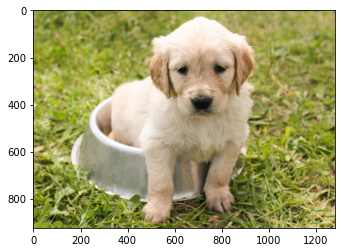

In [3]:
# 显示图像
plt.imshow(img[:,:,::-1]) # 将图像从BGR转换为RGB
plt.show()                # 显示图像

### 3. 使用 NumPy 向图像增加常量

使用 NumPy 将常量 `100` 添加到图像中，NumPy 将同时将三个通道的像素值全部加上 `100`

In [4]:
# 增加 100 常量到图像中
numpyImg = img+100

使用 Matplotlib 显示图像，输出信息如下。X 轴和 Y 轴分别为图像的宽度和高度:

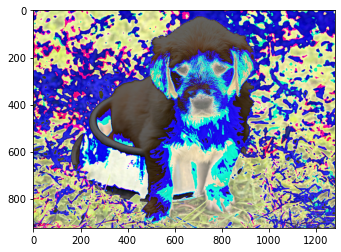

In [5]:
# 显示图像
plt.imshow(numpyImg[:,:,::-1]) # 将图像从BGR转换为RGB
plt.show()                     # 显示图像

请注意，将值 `100` 相加会严重破坏了图像。这是因为 NumPy 对新像素值执行了取模运算。因此，在处理为图像添加常量值时，不建议使用 NumPy 的方法。

### 4. 使用 OpenCV 向图像增加常量

使用 OpenCV 的 `cv2.add` 函数，将常量 `100` 添加到图像中。默认情况下，OpenCV 只会在 BGR 的第一个通道（蓝色通道）的像素上增加常量到像素值中。

In [6]:
# 使用OpenCV增加常量100
opencvImg = cv2.add(img,100)

使用 Matplotlib 显示图像，输出信息如下。X 轴和 Y 轴分别为图像的宽度和高度:

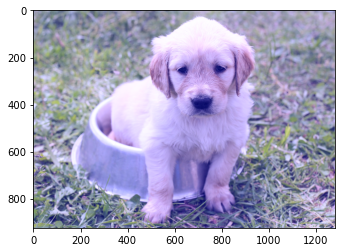

In [7]:
# 显示图像
plt.imshow(opencvImg[:,:,::-1]) # 将图像从BGR转换为RGB
plt.show()                      # 显示图像

如上图所示，图像的蓝色调增加了。这是因为仅将值 `100` 添加到了图像的第一个通道，即：蓝色通道。

### 5. 使用 OpenCV 实现多张图像叠加

通过将图像添加到图像，而不是向图像添加值来解决上面问题。先检查图像形状，如下所示：

In [8]:
img.shape # 查看图像形状

(924, 1280, 3)

现在，创建一个与原始图像具有相同形状的图像，其像素值固定为 `100`。我们这样做是因为我们想将值 `100` 添加到原始图像的每个通道：

In [9]:
# 通过创建一个与原图像尺寸一致，全1填充的NumPy数组，之后对数组乘100实现
nparr = np.ones((924,1280,3),dtype=np.uint8) * 100 

使用 OpenCV 的 `cv2.add` 函数，将 `nparr` 添加到原图像 `img` 并可视化结果

In [10]:
opencvImg = cv2.add(img,nparr) # 将nparr添加到原图像img

使用 Matplotlib 显示图像，输出信息如下。X 轴和 Y 轴分别为图像的宽度和高度:

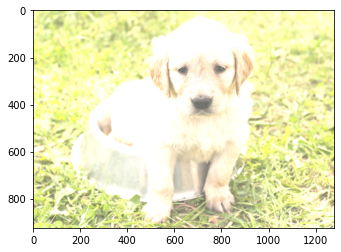

In [11]:
# 显示图像
plt.imshow(opencvImg[:,:,::-1]) # 将图像从BGR转换为RGB
plt.show()                      # 显示图像

### 6. 使用 NumPy 实现多张图像叠加

同样，我们可以使用 NumPy，将新创建的全 1 填充并乘以 100 的数组（图像）`nparr`，叠加到原图像 `img` 上。实际上得到的结果与直接在原图像上增加 100 常量值后，进行取模运算的结果一致 —— 全部三个通道都加上 `100`。

In [12]:
npImg = img + nparr

使用 Matplotlib 显示图像，输出信息如下。X 轴和 Y 轴分别为图像的宽度和高度:

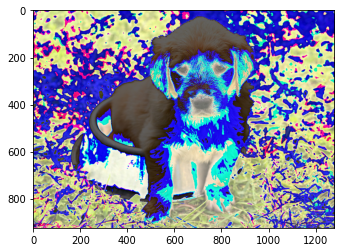

In [13]:
# 显示图像
plt.imshow(npImg[:,:,::-1]) # 将图像从BGR转换为RGB
plt.show()                  # 显示图像

### 实验小结

从结果中值得注意的是，使用 OpenCV 为图像添加一个值会导致图像的亮度增加。您可以尝试减去一个值(或添加一个负数)，看看反过来是否也为真。

在本实验中，我们看到了如何使用 NumPy 和 OpenCV 的 `cv2.add` 函数执行图像加法与叠加。我们向图像添加了一个常量值，并比较了使用 `cv2.add` 函数与使用 NumPy 的加法操作符 `(+)` 获得的输出的区别。我们在使用 `cv2.add` 函数时，该值被添加到蓝色通道中。你可以通过创建与输入图像相同的形状的图像，其所有像素值都与我们想要添加到原图像上的常量相等，之后通过图像叠加实现将常量增加到图像的所有通道的像素当中。